In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt

# Load images

In [2]:
dir = "../train_model/raw_data/digits/"

In [19]:
def load_dataset(dir):
    image_arrays = []
    labels = []
    for i in range(10):
        label = i
        images = os.listdir(dir + str(i))
        for image in images:
            img = Image.open(dir + str(i) + '/' + image)
            array = np.array(img)
            grey = cv2.cvtColor(array, cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(grey, (50, 32))
            image_arrays.append(resized.flatten())
            labels.append(label)
    return np.vstack(image_arrays), labels

In [20]:
images, labels = load_dataset(dir)

# Establish basline

In [130]:
def load_dataset_downsample(dir):
    image_arrays = []
    labels = []
    for i in range(10):
        label = i
        images = os.listdir(dir + str(i))
        for image in images:
            img = Image.open(dir + str(i) + '/' + image)
            array = np.array(img)
            grey = cv2.cvtColor(array, cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(grey, (32, 50))
            image_arrays.append(resized.flatten())
            labels.append(label)
    return np.vstack(image_arrays), labels

In [155]:
images, labels = load_dataset_downsample(dir)

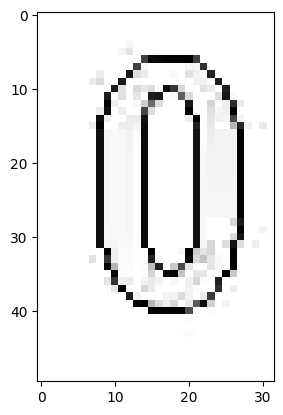

In [156]:
plt.imshow(images[0].reshape(50, 32), cmap='gray')

# Train test split

In [3]:
from sklearn.model_selection import train_test_split

In [158]:
y_train, y_test, x_train, x_test = train_test_split(labels, images, test_size=0.2, random_state=42, stratify=labels)

# Preprocessing

In [198]:
from sklearn.preprocessing import StandardScaler

In [160]:
scaler = StandardScaler()

In [161]:
scaled = scaler.fit_transform(x_train)

# Train model

In [199]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

In [164]:
clf.fit(scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [200]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [166]:
accuracy_score(y_test, clf.predict(scaler.transform(x_test)))

0.975

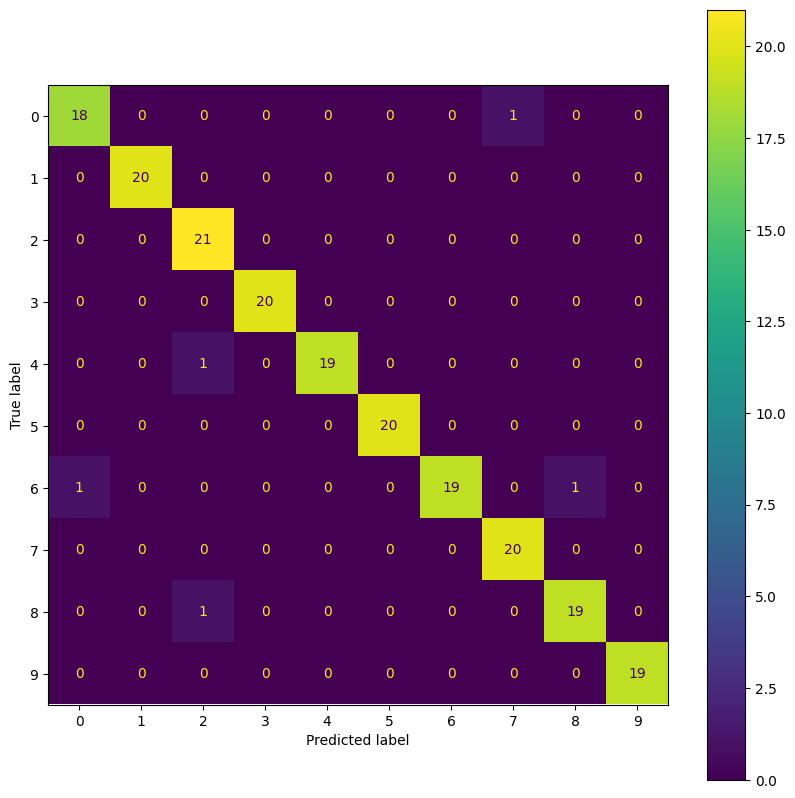

In [167]:
f, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_estimator(clf, scaler.transform(x_test), y_test, ax=ax)
plt.show()

This looks very good!

# Try color info

In [192]:
def load_dataset_w_color(dir):
    image_arrays = []
    labels = []
    for i in range(10):
        label = i
        images = os.listdir(dir + str(i))
        for image in images:
            img = Image.open(dir + str(i) + '/' + image)
            array = np.array(img)
            resized = cv2.resize(array, (8, 16))
            image_arrays.append(resized.flatten())
            labels.append(label)
    return np.vstack(image_arrays), labels

In [193]:
images, labels = load_dataset_w_color(dir)

In [194]:
images.shape

(998, 384)

# Train test split

In [195]:
y_train, y_test, x_train, x_test = train_test_split(labels, images, test_size=0.2, random_state=42, stratify=labels)

In [201]:
scaler = StandardScaler()

In [202]:
scaled = scaler.fit_transform(x_train)

# Train model

In [203]:
from sklearn.ensemble import RandomForestClassifier

In [204]:
clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

In [205]:
clf.fit(scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [206]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [207]:
accuracy_score(y_test, clf.predict(scaler.transform(x_test)))

0.98

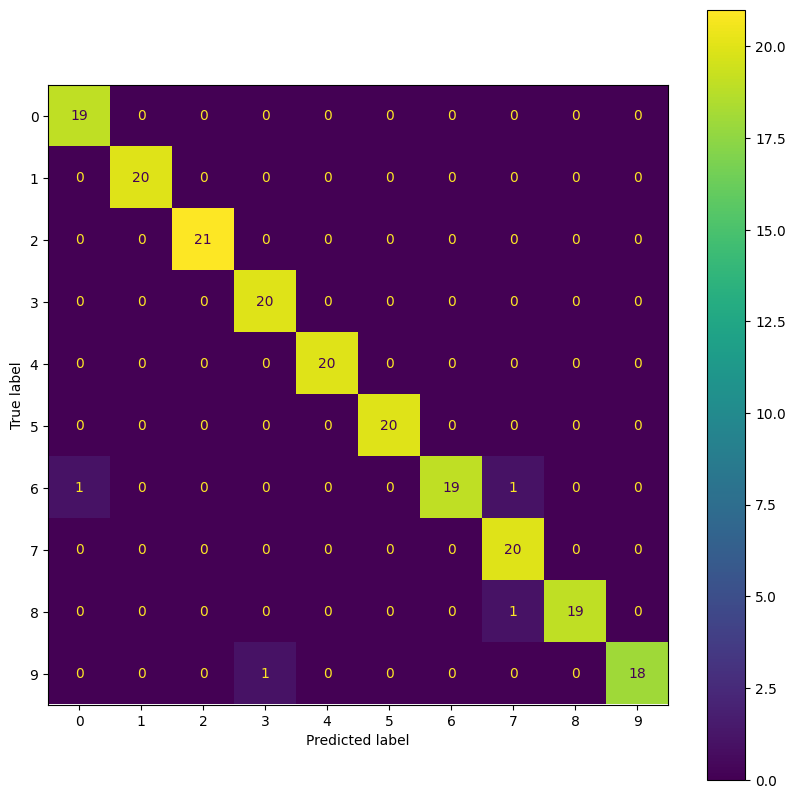

In [208]:
f, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_estimator(clf, scaler.transform(x_test), y_test, ax=ax)
plt.show()

In [209]:
from sklearn.model_selection import cross_val_score

In [210]:
results = cross_val_score(clf, scaled, y_train, cv=20)

In [212]:
np.mean(results)

0.9762179487179488

# Try edge detection filters

In [213]:
def load_dataset_w_color(dir):
    image_arrays = []
    labels = []
    for i in range(10):
        label = i
        images = os.listdir(dir + str(i))
        for image in images:
            img = Image.open(dir + str(i) + '/' + image)
            array = np.array(img)
            # blur
            blurred = cv2.GaussianBlur(array, (5, 5), 0)
            # canny edge detection
            edges = cv2.Canny(blurred, 100, 200)
            edges_resized = cv2.resize(edges, (12, 20)).flatten()
            resized = cv2.resize(array, (12, 20)).flatten()
            image_vector = np.concatenate((edges_resized, resized))
            image_arrays.append(image_vector)
            labels.append(label)
    return np.vstack(image_arrays), labels

In [214]:
images, laels = load_dataset_w_color(dir)

In [215]:
images.shape

(998, 960)

# Train test split

In [216]:
y_train, y_test, x_train, x_test = train_test_split(labels, images, test_size=0.2, random_state=42, stratify=labels)

In [217]:
scaler = StandardScaler()

In [218]:
scaled = scaler.fit_transform(x_train)

# Train model

In [219]:
from sklearn.ensemble import RandomForestClassifier

In [220]:
clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

In [221]:
clf.fit(scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [259]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [260]:
accuracy_score(y_test, clf.predict(scaler.transform(x_test)))

0.99

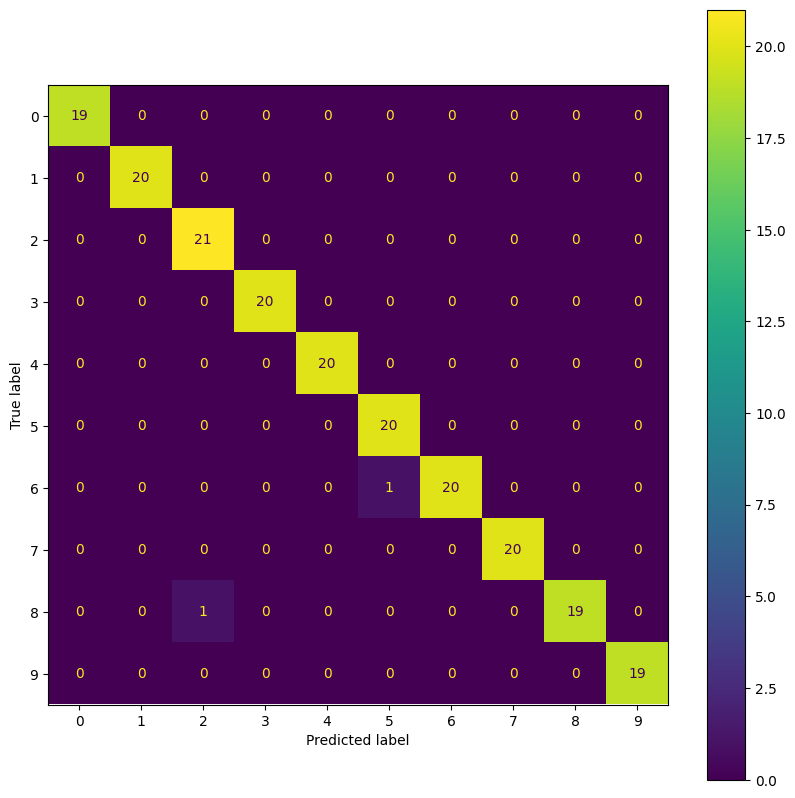

In [261]:
f, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_estimator(clf, scaler.transform(x_test), y_test, ax=ax)
plt.show()

In [262]:
from sklearn.model_selection import cross_val_score

In [263]:
results = cross_val_score(clf, scaled, y_train, cv=20)

In [265]:
results

array([0.95      , 0.975     , 0.975     , 0.975     , 1.        ,
       1.        , 1.        , 1.        , 0.975     , 0.95      ,
       0.95      , 1.        , 0.975     , 0.9       , 1.        ,
       0.975     , 0.975     , 1.        , 0.97435897, 1.        ])

In [264]:
np.mean(results)

0.9774679487179487

-  a little better

# Let's look at mistakes

In [266]:
bad_examples = y_test != clf.predict(scaler.transform(x_test))

In [267]:
bad_images = np.array(x_test)[bad_examples]

In [268]:
true_label = np.array(y_test)[bad_examples]

In [269]:
true_label[1]

6

In [270]:
predicted_label = clf.predict(scaler.transform(bad_images))[1]

In [271]:
predicted_label

5

# Try small convolutional network

In [222]:
import torch
import torchvision

In [223]:
n_epochs = 300
batch_size_train = 10
batch_size_test = 10
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [224]:
from torchvision.transforms import ToTensor, Compose, Normalize, Resize

In [225]:
transforms = Compose([ToTensor(), Resize((16, 25)), Normalize((0.1307,), (0.3081,))])

In [226]:
data = torchvision.datasets.ImageFolder(root=dir, transform=transforms)

In [227]:
len(data)

998

In [56]:
train_subset, val_subset = torch.utils.data.random_split(
        data, [int(len(data) * 0.8), len(data) - (int(len(data) * 0.8))], generator=torch.Generator().manual_seed(1))

In [57]:
train_loader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size_train, shuffle=True)

In [58]:
test_loader = torch.utils.data.DataLoader(val_subset, batch_size=batch_size_train, shuffle=True)

# Build network

In [154]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [155]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(60, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(x.size(0), 60)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return nn.LogSoftmax(dim=1)(x)

In [156]:
network  = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [157]:
network.cuda()

Net(
  (conv1): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=60, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

# Train model

In [158]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [228]:
def train(epoch, network, optimizer, train_loader):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data.cuda())
    loss = F.nll_loss(output, target.cuda())
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

def test(network, test_loader):
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data.cuda()).cpu()
      test_loss += F.nll_loss(output, target, reduction='sum').item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))
  return 100. * correct / len(test_loader.dataset)

def training_experiment(n_epochs,network, optimizer, train_loader, test_loader):
    for epoch in range(1, n_epochs + 1):
        train(epoch, network, optimizer, train_loader)
        test(network, test_loader)
    return test(network, test_loader), network

def get_dataloaders_splits(data):
  train_subset, val_subset = torch.utils.data.random_split(
            data, [int(len(data) * 0.8), len(data) - (int(len(data) * 0.8))], generator=torch.Generator())
  train_loader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size_train, shuffle=True)
  test_loader = torch.utils.data.DataLoader(val_subset, batch_size=batch_size_train, shuffle=True)
  return train_loader, test_loader

def get_model():
  network  = Net()
  optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                        momentum=momentum)
  network.cuda()
  return network, optimizer

def bootstrap_experiment(n_epochs, n):
    results = []
    for i in range(n):
        print("Running bootstrap experiment: " + str(i))
        network, optimizer = get_model()
        train_loader, test_loader = get_dataloaders_splits(data)
        result, model = training_experiment(n_epochs, network, optimizer, train_loader, test_loader)
        results.append(result)
    return results

In [178]:
result = bootstrap_experiment(50, 10)

Running bootstrap experiment: 0
Train Epoch: 1 [0/798 (0%)]	Loss: 2.358800
Train Epoch: 1 [100/798 (12%)]	Loss: 2.245432
Train Epoch: 1 [200/798 (25%)]	Loss: 2.272980
Train Epoch: 1 [300/798 (38%)]	Loss: 2.369586
Train Epoch: 1 [400/798 (50%)]	Loss: 2.324393
Train Epoch: 1 [500/798 (62%)]	Loss: 2.311904
Train Epoch: 1 [600/798 (75%)]	Loss: 2.321509
Train Epoch: 1 [700/798 (88%)]	Loss: 2.377161

Test set: Avg. loss: 2.2761, Accuracy: 43/200 (22%)

Train Epoch: 2 [0/798 (0%)]	Loss: 2.290271
Train Epoch: 2 [100/798 (12%)]	Loss: 2.313030
Train Epoch: 2 [200/798 (25%)]	Loss: 2.268588
Train Epoch: 2 [300/798 (38%)]	Loss: 2.305645
Train Epoch: 2 [400/798 (50%)]	Loss: 2.284916
Train Epoch: 2 [500/798 (62%)]	Loss: 2.327997
Train Epoch: 2 [600/798 (75%)]	Loss: 2.219756
Train Epoch: 2 [700/798 (88%)]	Loss: 2.293387

Test set: Avg. loss: 2.2334, Accuracy: 48/200 (24%)

Train Epoch: 3 [0/798 (0%)]	Loss: 2.253511
Train Epoch: 3 [100/798 (12%)]	Loss: 2.197968
Train Epoch: 3 [200/798 (25%)]	Loss: 2.07

In [180]:
np.mean(result)

99.0

- It looks like this is much btter

In [229]:
network, optimizer = get_model()
train_loader, test_loader = get_dataloaders_splits(data)
result, model = training_experiment(50, network, optimizer, train_loader, test_loader)

Train Epoch: 1 [0/798 (0%)]	Loss: 2.327458
Train Epoch: 1 [100/798 (12%)]	Loss: 2.255511
Train Epoch: 1 [200/798 (25%)]	Loss: 2.272627
Train Epoch: 1 [300/798 (38%)]	Loss: 2.324379
Train Epoch: 1 [400/798 (50%)]	Loss: 2.305150
Train Epoch: 1 [500/798 (62%)]	Loss: 2.377299
Train Epoch: 1 [600/798 (75%)]	Loss: 2.316823
Train Epoch: 1 [700/798 (88%)]	Loss: 2.329024

Test set: Avg. loss: 2.3006, Accuracy: 24/200 (12%)

Train Epoch: 2 [0/798 (0%)]	Loss: 2.316864
Train Epoch: 2 [100/798 (12%)]	Loss: 2.289572
Train Epoch: 2 [200/798 (25%)]	Loss: 2.311148
Train Epoch: 2 [300/798 (38%)]	Loss: 2.312396
Train Epoch: 2 [400/798 (50%)]	Loss: 2.297044
Train Epoch: 2 [500/798 (62%)]	Loss: 2.262494
Train Epoch: 2 [600/798 (75%)]	Loss: 2.310344
Train Epoch: 2 [700/798 (88%)]	Loss: 2.227211

Test set: Avg. loss: 2.2850, Accuracy: 41/200 (20%)

Train Epoch: 3 [0/798 (0%)]	Loss: 2.335038
Train Epoch: 3 [100/798 (12%)]	Loss: 2.247199
Train Epoch: 3 [200/798 (25%)]	Loss: 2.232827
Train Epoch: 3 [300/798 (38

In [235]:
image, label = next(iter(test_loader))

In [233]:
model.cpu()

Net(
  (conv1): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=60, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [236]:
image.cpu()

tensor([[[[ 1.5105,  1.5105,  1.5105,  ...,  1.5105,  1.5105,  1.5105],
          [ 1.5105,  1.5105,  1.5105,  ...,  1.5105,  1.5105,  1.5105],
          [ 1.5526,  1.5470,  1.5547,  ...,  1.5105,  1.5105,  1.5105],
          ...,
          [ 1.5868,  1.5868,  1.5868,  ...,  1.6153,  1.6265,  1.6282],
          [ 1.5868,  1.5868,  1.5868,  ...,  1.5758,  1.5815,  1.5759],
          [ 1.5708,  1.5503,  1.5497,  ...,  1.5861,  1.5865,  1.5868]],

         [[ 1.3832,  1.3832,  1.3832,  ...,  1.3832,  1.3832,  1.3832],
          [ 1.3832,  1.3832,  1.3832,  ...,  1.3832,  1.3832,  1.3832],
          [ 1.4254,  1.4197,  1.4274,  ...,  1.3832,  1.3832,  1.3832],
          ...,
          [ 1.4468,  1.4468,  1.4468,  ...,  1.4880,  1.4993,  1.5009],
          [ 1.4468,  1.4468,  1.4468,  ...,  1.4485,  1.4542,  1.4486],
          [ 1.4485,  1.4588,  1.4766,  ...,  1.4468,  1.4473,  1.4476]],

         [[ 1.4341,  1.4341,  1.4341,  ...,  1.4341,  1.4341,  1.4341],
          [ 1.4341,  1.4341,  

In [239]:
%%timeit
model(image)

464 µs ± 5.69 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [248]:
torch.save(model.state_dict(), "../weights/ocr_v3.pt")

- This is fast

In [243]:
rf_input = scaled[0, :].reshape(1, -1)

In [246]:
%%timeit
clf.predict(rf_input)

8.7 ms ± 89.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


- Ok, let's use the conv model!